In [ ]:
!pip install opencv-python

In [2]:
import tensorflow as tf # this is to import tensorflow
import json # this is to import json
import pandas as pd # this is to import pandas
import numpy as np # this is to import numpy
from skimage import io, transform # this is to import skimage
from sklearn.model_selection import train_test_split # this is just for train test split lol
import cv2 # compooter vision
from tensorflow.keras import datasets, layers, models, losses, Model # this imports things
from tqdm.notebook import tqdm # this is literally just a progress bar
import os # operating system things
import glob # this is because file pathnames are a big aaaaaaaaaauuuuuuuuugh

In [3]:
# Read the json
with open("amogus2.json", 'r') as f:
    data_df = pd.json_normalize([i for i in json.loads(f.read()) if i is not None])
data_df = data_df.set_index("id")
data_df

,url_256,url_1024,country,lat,lng,location_id
id,,,,,,
1509662729539070,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,null,0.000000e+00,0.000000e+00,090180
1587956288269248,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,null,0.000000e+00,0.000000e+00,090180
1414341782427856,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,null,0.000000e+00,0.000000e+00,090180
1504003806771142,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,null,5.404263e-08,-9.539572e-07,090170
1502346620201016,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,null,0.000000e+00,0.000000e+00,090180
...,...,...,...,...,...,...
4204140206347239,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,Thailand,9.455834e+00,9.920649e+01,090270
1405412416480572,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,Thailand,9.389187e+00,9.916939e+01,090270
3963740523712531,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,Thailand,9.670108e+00,9.911407e+01,090270


In [4]:
value_counts = data_df['location_id'].value_counts()

# create a boolean mask to select the rows where the value occurs >= 10 times
mask = data_df['location_id'].isin(value_counts[value_counts >= 10].index)

# apply the boolean mask to the dataframe to filter out the rows
df_filtered = data_df[mask]
df_filtered

,url_256,url_1024,country,lat,lng,location_id
id,,,,,,
1509662729539070,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,null,0.000000e+00,0.000000e+00,090180
1587956288269248,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,null,0.000000e+00,0.000000e+00,090180
1414341782427856,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,null,0.000000e+00,0.000000e+00,090180
1504003806771142,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,null,5.404263e-08,-9.539572e-07,090170
1502346620201016,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,null,0.000000e+00,0.000000e+00,090180
...,...,...,...,...,...,...
4204140206347239,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,Thailand,9.455834e+00,9.920649e+01,090270
1405412416480572,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,Thailand,9.389187e+00,9.916939e+01,090270
3963740523712531,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,Thailand,9.670108e+00,9.911407e+01,090270


In [5]:
# images = {}
# folder = "img2"
# for filename in tqdm(os.listdir(folder)):
#     img = cv2.imread(os.path.join(folder,filename))
#     if img is not None:
#         if img.shape!=(128,256,3):
#             img = (255 * transform.resize(img, (128,256))).astype(np.uint8)
#         images[os.path.splitext(filename)[0]] = img
        
# reshape image
def reshape(img):
    if img.shape!=(192,256,3):
        img = (255 * transform.resize(img, (192,256))).astype(np.uint8)
    return img

In [ ]:
images = {file: cv2.imread(file) for file in tqdm(glob.glob("img2/*.jpg"))}

  0%|          | 0/76440 [00:00<?, ?it/s]

In [6]:
img_series = pd.Series(images)
img_series = img_series[img_series.notna()].copy()
img_series = img_series[[i.shape==(192, 256, 3) for i in img_series]].copy() # change to reshape
# img_series = img_series.apply(lambda x: reshape(x))
img_series = img_series.rename(lambda str: str[5:-4]) # convert file name e.g. "img2\1000148914149750.jpg"->1000148914149750
img_series
# img_series.apply(lambda x:x.shape).value_counts() # see different aspect ratios and their freqs

1000148914149750    [[[198, 195, 180], [199, 196, 181], [200, 197,...
1000165370829738    [[[230, 214, 177], [229, 213, 176], [228, 212,...
1000308077173457    [[[255, 255, 255], [255, 255, 255], [255, 255,...
1000390084038009    [[[67, 66, 68], [69, 65, 64], [71, 59, 53], [9...
1000458640591153    [[[119, 170, 162], [186, 233, 225], [221, 255,...
                                          ...                        
998701807658769     [[[249, 255, 254], [249, 255, 254], [249, 255,...
998725354365655     [[[47, 52, 61], [29, 34, 43], [15, 17, 27], [1...
999467060756443     [[[231, 215, 192], [232, 216, 193], [232, 216,...
999582334115510     [[[189, 144, 101], [188, 143, 100], [190, 143,...
999991773868952     [[[176, 167, 163], [176, 167, 163], [176, 167,...
Length: 31661, dtype: object

In [7]:
data_df["img"] = img_series
data_df = data_df.dropna()
data_df

,url_256,url_1024,coordinates,country,img
id,,,,,
1509662729539070,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[0, 0]",null,"[[[144, 150, 157], [144, 150, 157], [144, 150,..."
1414341782427856,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[0, 0]",null,"[[[124, 127, 101], [255, 255, 237], [182, 181,..."
1504003806771142,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[-9.5395717634566e-07, 5.4042628244286e-08]",null,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1502346620201016,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[0, 0]",null,"[[[222, 231, 234], [214, 223, 226], [215, 224,..."
1548739535521112,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[3.1402148603315e-09, -2.7646415881002e-09]",null,"[[[98, 103, 104], [98, 103, 104], [97, 102, 10..."
...,...,...,...,...,...
3894961763872349,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[99.130769289577, 9.5050045863067]",Thailand,"[[[114, 120, 119], [61, 67, 66], [11, 17, 16],..."
4290124437684494,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[99.131618903251, 9.5203148594143]",Thailand,"[[[156, 154, 154], [164, 162, 162], [157, 157,..."
1405412416480572,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[99.169389331325, 9.3891869120472]",Thailand,"[[[151, 147, 146], [151, 147, 146], [151, 147,..."


In [ ]:
country_df = data_df[data_df["country"] != "null"]
country_df

In [115]:
country_df.groupby(['country']).count().sort_values(by='img')

,url_256,url_1024,coordinates,img
country,,,,
Palestinian Territory,1,1,1,1
Saint Lucia,1,1,1,1
Hong Kong S.A.R.,1,1,1,1
Singapore,1,1,1,1
Ukraine,1,1,1,1
...,...,...,...,...
Canada,1343,1343,1343,1343
Brazil,1441,1441,1441,1441
China,1541,1541,1541,1541


In [ ]:
wts = (1 / country_df.groupby(['country']).count().reset_index()["img"])
wts

In [1]:
wts

NameError: name 'wts' is not defined

In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
enc_country_df = pd.DataFrame(encoder.fit_transform(country_df[['country']]).toarray())
enc_country_df

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# img_series = img_series[[i.shape==(192, 256, 3) for i in img_series]].copy()
# img_series

In [11]:
# ids = [os.path.splitext(os.path.basename(filename))[0] for filename in tqdm(img_series.index)]
# imgs = img_series.values

In [13]:
# coords = np.stack(data_df.loc[ids, "coordinates"])
# coords

(192, 256, 3)    31111
Name: img, dtype: int64

In [15]:
country_df

,url_256,url_1024,coordinates,country,img
id,,,,,
323130512496076,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[-47.681655598075, -0.64899339634737]",Brazil,"[[[215, 182, 137], [214, 181, 136], [214, 181,..."
477735123552105,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[-47.680764100422, -0.64640579875362]",Brazil,"[[[180, 154, 117], [180, 154, 117], [180, 155,..."
973070119934407,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[-47.682088909939, -0.64996962068538]",Brazil,"[[[196, 163, 117], [196, 163, 117], [197, 164,..."
508469686990915,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[-47.679021635769, -0.64415913022745]",Brazil,"[[[221, 215, 208], [224, 218, 211], [224, 218,..."
287886579730767,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[-47.67984767599, -0.64509245303067]",Brazil,"[[[250, 247, 242], [246, 243, 238], [242, 238,..."
...,...,...,...,...,...
3894961763872349,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[99.130769289577, 9.5050045863067]",Thailand,"[[[114, 120, 119], [61, 67, 66], [11, 17, 16],..."
4290124437684494,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[99.131618903251, 9.5203148594143]",Thailand,"[[[156, 154, 154], [164, 162, 162], [157, 157,..."
1405412416480572,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,https://scontent.fsin14-2.fna.fbcdn.net/m1/v/t...,"[99.169389331325, 9.3891869120472]",Thailand,"[[[151, 147, 146], [151, 147, 146], [151, 147,..."


In [16]:
X_train_index, X_test_index, y_train, y_test = train_test_split(list(country_df.index), enc_country_df, test_size=0.20)

In [17]:
X_train = np.stack(img_series[X_train_index].values)
X_test = np.stack(img_series[X_test_index].values)

In [18]:
resnet_model = tf.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (192,256,3))
for layer in resnet_model.layers:
    layer.trainable = False

In [19]:
model = models.Sequential()
#model.add(layers.Lambda(lambda image: tf.image.resize(image, (128, 256))))
model.add(resnet_model)
model.add(layers.Flatten())
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(len(enc_country_df.columns), activation="softmax"))

In [124]:
loss = tf.keras.losses.CategoricalCrossentropy()

In [20]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=64, epochs=5, class_weight=wts, validation_data=(X_test[:100], y_test[:100]))

Epoch 1/30
  4/389 [..............................] - ETA: 5:54:36 - loss: 3.4837e-05 - accuracy: 0.1523

In [22]:
from collections import Counter
Counter([i.shape for i in tqdm(img_series)])

  0%|          | 0/31661 [00:00<?, ?it/s]

Counter({(192, 256, 3): 31661})

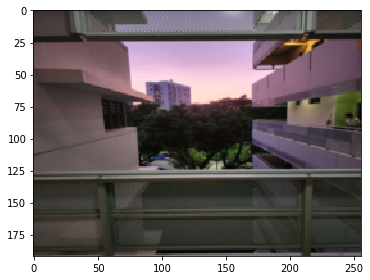

In [126]:
# theimg = reshape(io.imread("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS2RBxzDiJKUypDZkMceKYNj9jrix5r2OcM5Q&usqp=CAU"))
theimg = reshape(io.imread("fuckaround_images/boarding.jpg"))
io.imshow(theimg)

In [127]:
p = model.predict(theimg[None, ...])
argmax = p[0].argmax()
encoder.categories_[0][argmax]

1/1 [==============================] - 4s 4s/step


'Russia'

In [128]:
# encoder.categories_[0][y_test.iloc[169].argmax()]


In [129]:
# X_test[169][None, ...]

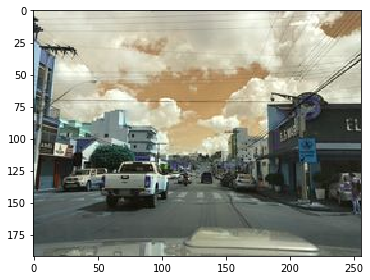

In [58]:
io.imshow(country_df['image'][380])

In [27]:
enc_country_df

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
